>**Problem Statement:**<br><br>
As the data scientist at a telecom company named “Neo” whose customers
are churning out to its competitors. I have to analyze the data of the
company and find insights and stop our customers from churning out to other
telecom companies.

>Import Libraries 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier  # For classification tasks
from sklearn.tree import DecisionTreeRegressor  # For regression tasks
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

>Load dataset

In [6]:
customer_churn = pd.read_csv('customer_churn.csv')
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


>Data Preprocessing

**Insight: No null values found**

In [7]:
#Check for null values
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#changing the TotalCharges object data to numeric to check if the nulll value is present
customer_churn["TotalCharges"]=pd.to_numeric(customer_churn["TotalCharges"], errors="coerce") # coerce will fill the whitespace with the NaN value in it.

In [10]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Define a function to check for whitespace or '?'
def check_for_missing_values(s):
    return ' ' in s or '?' in s

# Apply the function to create a mask for cells that need to be replaced with NaN
mask = customer_churn.applymap(lambda x: check_for_missing_values(str(x)))

# Replace the identified cells with NaN
data_cleaned = customer_churn.where(~mask, np.nan)

data_cleaned

C:\Users\adeye\AppData\Local\Temp\ipykernel_23592\307142624.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = customer_churn.applymap(lambda x: check_for_missing_values(str(x)))


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,NaN,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,NaN,No,NaN,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,NaN,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,NaN,No,NaN,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,NaN,No,...,No,No,No,No,Month-to-month,Yes,NaN,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,NaN,Yes,NaN,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,NaN,No,...,Yes,No,Yes,Yes,NaN,Yes,NaN,103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,NaN,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,NaN,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,NaN,No,...,No,No,No,No,Month-to-month,Yes,NaN,74.40,306.6,Yes


In [12]:
customer_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# We can consider dropping the null values since it's very low
customer_churn.dropna(inplace=True) # to make the changes permanent

>Null values dropped

In [14]:
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Check for duplicates values in the dataset**

In [15]:
customer_churn.duplicated().sum()

0

>Tasks To Be Performed:<br><br>
1. Data Manipulation:<br>
● Extract the 5th column and store it in ‘customer_5’<br>
● Extract the 15th column and store it in ‘customer_15’<br>
● Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’<br>
● Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure’<br>
● Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’<br>
● Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’<br>
● Get the count of different levels from the ‘Churn’ column<br>


In [18]:
#Extract the 5th column and store it in ‘customer_5’
customer_5 = customer_churn.iloc[:, 4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object

In [20]:
#Extract the 15th column and store it in ‘customer_15’
customer_15 = customer_churn.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7032, dtype: object

In [21]:
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [31]:
#Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
senior_male_electronic =customer_churn.loc[(customer_churn['gender']=='Male' )  & (customer_churn['SeniorCitizen']==1) &  (customer_churn['PaymentMethod']=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [35]:
#Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure =customer_churn.loc[(customer_churn['tenure']>70 )  | (customer_churn['MonthlyCharges']>100) ]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [38]:
#Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes =customer_churn.loc[(customer_churn['Contract']=='Two year')  & (customer_churn['PaymentMethod']=='Mailed check') & (customer_churn['Churn']=='Yes')]
two_mail_yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [39]:
#Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’
customer_333 = customer_churn.sample(n=333, random_state=1)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1778,6181-AXXYF,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,No
5036,1268-ASBGA,Female,1,Yes,No,16,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.35,1375.15,Yes
1106,4159-NAAIX,Female,0,No,No,63,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,No
1665,1219-NNDDO,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.85,663.55,No
927,9625-QSTYE,Female,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.15,952.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,6705-LNMDD,Male,0,No,No,20,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,50.00,1003.05,No
6779,0076-LVEPS,Male,0,No,Yes,29,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,45.00,1242.45,No
6244,5331-RGMTT,Male,1,Yes,No,54,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.05,5295.70,No
5126,4188-FRABG,Male,0,Yes,No,57,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,103.05,5925.75,No


In [40]:
#Get the count of different levels from the ‘Churn’ column
diff_levels= customer_churn['Churn'].value_counts()
diff_levels

Churn
No     5163
Yes    1869
Name: count, dtype: int64

>2. Data Visualization:<br><br>
● Build a bar-plot for the ’InternetService’ column:<br>
a. Set x-axis label to ‘Categories of Internet Service’<br>
b. Set y-axis label to ‘Count of Categories’<br>
c. Set the title of plot to be ‘Distribution of Internet Service’<br>
d. Set the color of the bars to be ‘orange’<br>
● Build a histogram for the ‘tenure’ column:<br>
a. Set the number of bins to be 30<br>
b. Set the color of the bins to be ‘green’<br>
c. Assign the title ‘Distribution of tenure’<br>
● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map<br>
‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:<br>
a. Assign the points a color of ‘brown’<br>
b. Set the x-axis label to ‘Tenure of customer’<br>
c. Set the y-axis label to ‘Monthly Charges of customer’<br>
d. Set the title to ‘Tenure vs Monthly Charges’<br>
e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &<br>
f. ‘Contract’ on the x-axis.


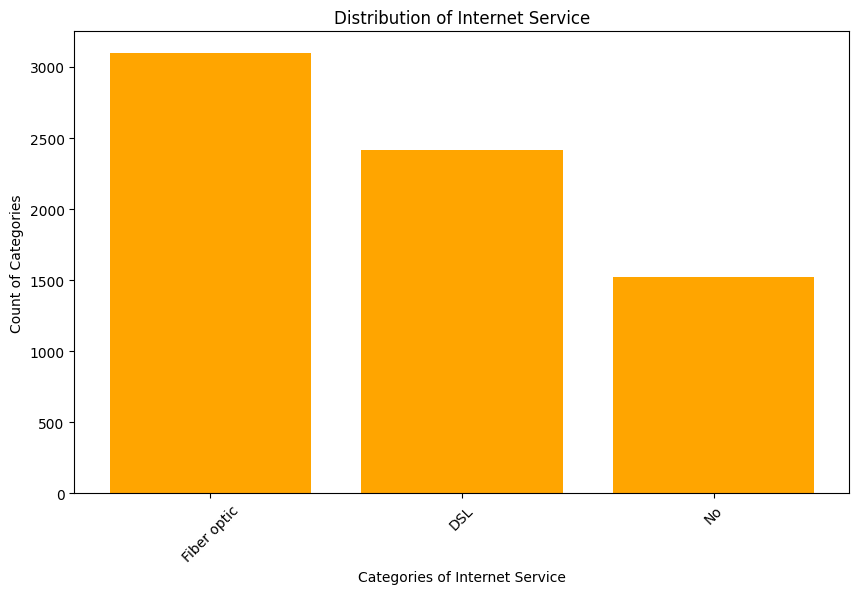

In [53]:
# Build a bar-plot for the ’InternetService’ column:<br>
# a. Set x-axis label to ‘Categories of Internet Service’<br>
# b. Set y-axis label to ‘Count of Categories’<br>
# c. Set the title of plot to be ‘Distribution of Internet Service’<br>
# d. Set the color of the bars to be ‘orange’<br>

internet_service_counts = customer_churn['InternetService'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(internet_service_counts.index, internet_service_counts.values, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.show()

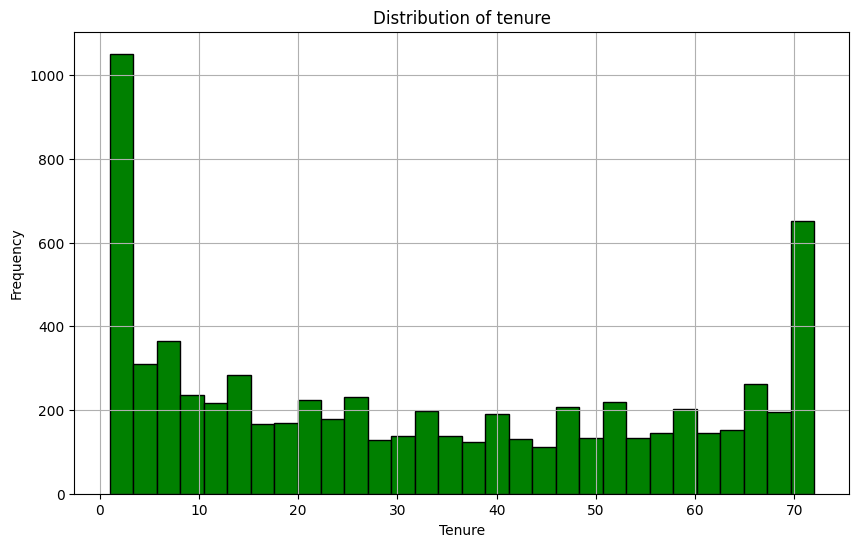

In [42]:
#● Build a histogram for the ‘tenure’ column:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title ‘Distribution of tenure’
# Create a histogram for the 'tenure' column
plt.figure(figsize=(10, 6))
plt.hist(customer_churn['tenure'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.grid(True)  # Optional: adds a grid for better readability
plt.show()



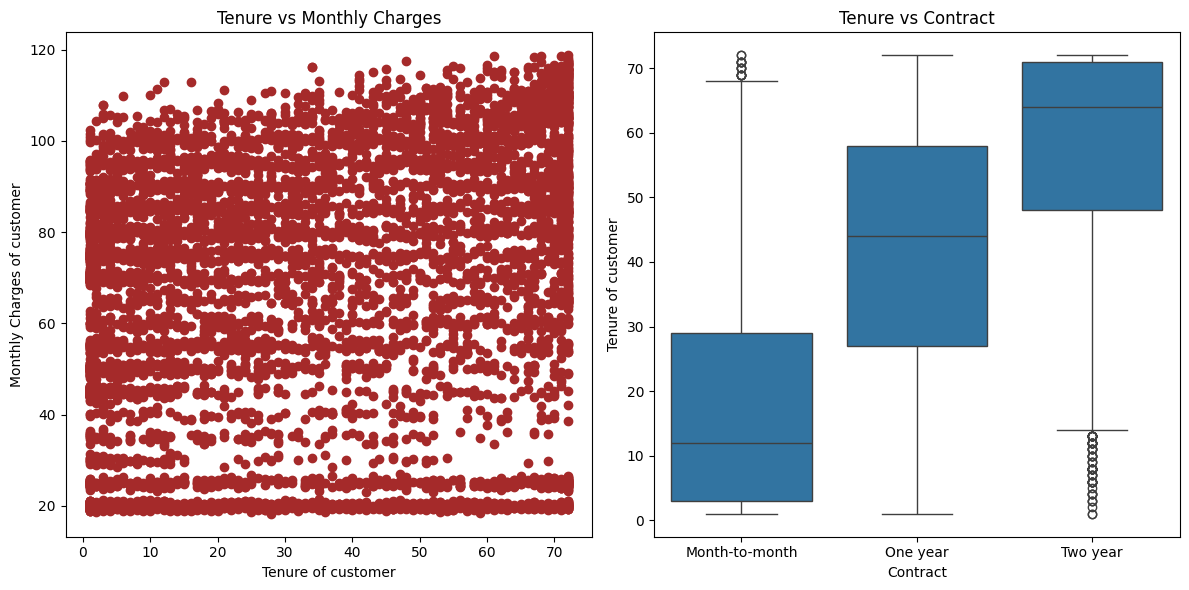

In [43]:
# ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:<br>
# a. Assign the points a color of ‘brown’
# b. Set the x-axis label to ‘Tenure of customer’
# c. Set the y-axis label to ‘Monthly Charges of customer’
# d. Set the title to ‘Tenure vs Monthly Charges’
# e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &<br>
# f. ‘Contract’ on the x-axis.

# Scatter plot between 'MonthlyCharges' and 'tenure'
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(customer_churn['tenure'], customer_churn['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

# Box plot between 'tenure' and 'Contract'
plt.subplot(1, 2, 2)
sns.boxplot(x='Contract', y='tenure', data=customer_churn)
plt.xlabel('Contract')
plt.ylabel('Tenure of customer')
plt.title('Tenure vs Contract')

# Show plots
plt.tight_layout()
plt.show()

> Linear Regression:<br><br>
Build a simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:<br>
a. Divide the dataset into train and test sets in 70:30 ratio.<br>
b. Build the model on train set and predict the values on test set<br>
c. After predicting the values, find the root mean square error<br>
d. Find out the error in prediction & store the result in ‘error’<br>
e. Find the root mean square error<br>

In [45]:
# Define features and target
X = customer_churn[['tenure']]
y = customer_churn['MonthlyCharges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate the error
error = y_test - y_pred

# Print the results
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Error (first 5 samples):\n{error.head()}')

Root Mean Squared Error (RMSE): 28.970721349228278
Error (first 5 samples):
2481   -47.994813
6784   -35.943647
6125    43.370805
3052   -10.887004
4099   -27.370667
Name: MonthlyCharges, dtype: float64


>Logistic Regression:<br><br>
 Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:<br>
a. Divide the dataset in 65:35 ratio<br>
b. Build the model on train set and predict the values on test set<br>
c. Build the confusion matrix and get the accuracy score<br>
d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’<br>
e. Divide the dataset in 80:20 ratio<br>
f. Build the model on train set and predict the values on test set<br>
g. Build the confusion matrix and get the accuracy

In [47]:


from sklearn.metrics import confusion_matrix, accuracy_score

# Convert 'Churn' column to binary
customer_churn['Churn_Binary'] = customer_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# --- Simple Logistic Regression ---

# Define features and target
X_simple = customer_churn[['MonthlyCharges']]
y_simple = customer_churn['Churn_Binary']

# Split the data into training and testing sets (65:35 ratio)
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.35, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_simple, y_train_simple)

# Predict on the test set
y_pred_simple = model.predict(X_test_simple)

# Build the confusion matrix and calculate the accuracy score
conf_matrix_simple = confusion_matrix(y_test_simple, y_pred_simple)
accuracy_simple = accuracy_score(y_test_simple, y_pred_simple)

print("Simple Logistic Regression:")
print(f"Confusion Matrix:\n{conf_matrix_simple}")
print(f"Accuracy Score: {accuracy_simple:.4f}")

# --- Multiple Logistic Regression ---

# Define features and target
X_multiple = customer_churn[['tenure', 'MonthlyCharges']]
y_multiple = customer_churn['Churn_Binary']

# Split the data into training and testing sets (80:20 ratio)
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.20, random_state=42)

# Initialize and train the model
model_multiple = LogisticRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)

# Predict on the test set
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Build the confusion matrix and calculate the accuracy score
conf_matrix_multiple = confusion_matrix(y_test_multiple, y_pred_multiple)
accuracy_multiple = accuracy_score(y_test_multiple, y_pred_multiple)

print("\nMultiple Logistic Regression:")
print(f"Confusion Matrix:\n{conf_matrix_multiple}")
print(f"Accuracy Score: {accuracy_multiple:.4f}")

Simple Logistic Regression:
Confusion Matrix:
[[1824    0]
 [ 638    0]]
Accuracy Score: 0.7409

Multiple Logistic Regression:
Confusion Matrix:
[[938  95]
 [215 159]]
Accuracy Score: 0.7797


>Classificatiion Report is for my personnal curiosity

In [49]:
from sklearn.metrics import classification_report
# Build the confusion matrix and calculate the accuracy score

accuracy_simple = accuracy_score(y_test_simple, y_pred_simple)
class_report_simple = classification_report(y_test_simple, y_pred_simple)


accuracy_multiple = accuracy_score(y_test_multiple, y_pred_multiple)
class_report_multiple = classification_report(y_test_multiple, y_pred_multiple)



print("\nMultiple Logistic Regression:")

print(f"Accuracy Score: {accuracy_simple:.4f}")
print(f"Classification Report:\n{class_report_simple}")

print(f"Accuracy Score: {accuracy_multiple:.4f}")
print(f"Classification Report:\n{class_report_multiple}")


Multiple Logistic Regression:
Accuracy Score: 0.7409
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1824
           1       0.00      0.00      0.00       638

    accuracy                           0.74      2462
   macro avg       0.37      0.50      0.43      2462
weighted avg       0.55      0.74      0.63      2462

Accuracy Score: 0.7797
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.63      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



c:\Users\adeye\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adeye\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adeye\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Decision Tree:<br><br>
Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:<br>
a. Divide the dataset in 80:20 ratio<br>
b. Build the model on train set and predict the values on test set<br>
c. Build the confusion matrix and calculate the accuracy

In [50]:
# --- Decision Tree Model ---

# Define features (independent variable) and target (dependent variable)
X = customer_churn[['tenure']]
y = customer_churn['Churn_Binary']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Build the confusion matrix and calculate the accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Decision Tree Model:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Classification Report:\n{class_report}")

Decision Tree Model:
Confusion Matrix:
[[938  95]
 [255 119]]
Accuracy Score: 0.7512
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1033
           1       0.56      0.32      0.40       374

    accuracy                           0.75      1407
   macro avg       0.67      0.61      0.62      1407
weighted avg       0.73      0.75      0.73      1407



>Random Forest:<br><br>
Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:<br>
a. Divide the dataset in 70:30 ratio<br>
b. Build the model on train set and predict the values on test set<br>
c. Build the confusion matrix and calculate the accuracy

In [51]:
# --- Random Forest Model ---
from sklearn.ensemble import RandomForestClassifier

# Define features (independent variables) and target (dependent variable)
X = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn['Churn_Binary']

# Split the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Build the confusion matrix and calculate the accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Random Forest Model:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Classification Report:\n{class_report}")

Random Forest Model:
Confusion Matrix:
[[1316  233]
 [ 317  244]]
Accuracy Score: 0.7393
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1549
           1       0.51      0.43      0.47       561

    accuracy                           0.74      2110
   macro avg       0.66      0.64      0.65      2110
weighted avg       0.73      0.74      0.73      2110

